In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# METRIC | DESCRIPTION
- fips | US County FIPS Codes
- lat | latitude 
- lon | longitude
- elivation | median elevation (meters) 
- slope1 | 0% <= slope <= 0.5% (percentage of slope in the fips area)
- slope2 | .5% <= slope <= 2% (percentage of slope in the fips area)
- slope3 | 2% <= slope <= 5% (percentage of slope in the fips area)
- slope4 | 5% <= slope <= 10% (percentage of slope in the fips area)
- slope5 | 10% <= slope <= 15% (percentage of slope in the fips area)
- slope6 | 15% <= slope <= 30% (percentage of slope in the fips area)
- slope7 | 30% <= slope <= 45% (percentage of slope in the fips area)
- slope8 | 45% < slope (percentage of slope in the fips area)
- aspectN| North: 0˚< aspect ≤45˚ or 315˚< aspect ≤360˚
- aspectE | East: 45˚ < aspect ≤ 135˚
- aspectS | South: 135˚ < aspect ≤ 225˚
- aspectW | West: 225˚ < aspect ≤ 315˚
- aspectUnknown | Undefined: Slope aspect undefined; this value is used for grids where slope gradient is undefined or slope 
- WAT_LAND | mapped water bodies (percenatage that adds to 1 for total amount of land)
- NVG_LAND | barren/very sparsely vegetated land (percenatage that adds to 1 for total amount of land)
- URB_LAND | built-up land (residential and infrastructure) (percenatage that adds to 1 for total amount of land)
- GRS_LAND | grass/scrub/woodland (percenatage that adds to 1 for total amount of land)
- FOR_LAND | forest land, calibrated to FRA2000 land statistics (percenatage that adds to 1 for total amount of land)
- CULTRF_LAND | rain-fed cultivated land (percenatage that adds to 1 for total amount of land)
- CULTIR_LAND | irrigated cultivated land (percenatage that adds to 1 for total amount of land)
- CULT_LAND | total cultivated land
- SQ1 | Nutrient availability
- SQ2 | Nutrient retention capacity
- SQ3 | Rooting conditions
- SQ4 | Oxygen availability to roots
- SQ5 | Excess salts.
- SQ6 | Toxicity
- SQ7 | Workability (constraining field management) 
- PRECTOT | Precipitation (mm day-1)
- PS | Surface Pressure (kPa) 
- QV2M | Specific Humidity at 2 Meters (g/kg)
- T2M | Temperature at 2 Meters (C)
- T2MDEW | Dew/Frost Point at 2 Meters (C)
- T2MWET | Wet Bulb Temperature at 2 Meters (C)
- T2M_MAX | Maximum Temperature at 2 Meters (C)
- T2M_MIN | Minimum Temperature at 2 Meters (C)
- T2M_RANGE | Temperature Range at 2 Meters (C)
- TS | Earth Skin Temperature (C)
- WS10M | Wind Speed at 10 Meters (m/s) 
- WS10M_MAX | Maximum Wind Speed at 10 Meters (m/s)
- WS10M_MIN | Minimum Wind Speed at 10 Meters (m/s)
- WS10M_RANGE | Wind Speed Range at 10 Meters (m/s) 
- WS50M | Wind Speed at 50 Meters (m/s)
- WS50M_MAX | Maximum Wind Speed at 50 Meters (m/s)
- WS50M_MIN | Minimum Wind Speed at 50 Meters (m/s)
- WS50M_RANGE | Wind Speed Range at 50 Meters (m/s)
- score | Score of drought

In [2]:
%%time
# load weekly data 
train = pd.read_csv('weekly_train.csv')
test = pd.read_csv('weekly_test.csv')
val = pd.read_csv('weekly_val.csv')

CPU times: user 28.8 s, sys: 10.4 s, total: 39.1 s
Wall time: 46.6 s


In [3]:
train.columns

Index(['Unnamed: 0', 'fips', 'lat', 'lon', 'elevation', 'slope1', 'slope2',
       'slope3', 'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN',
       'aspectE', 'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND',
       'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND',
       'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6',
       'SQ7', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

In [4]:
train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0', axis=1)
val = val.drop('Unnamed: 0', axis=1)
print(train.columns)
print(test.columns)
print(val.columns)

Index(['fips', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE',
       'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND', 'NVG_LAND',
       'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND',
       'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7', 'date',
       'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score'],
      dtype='object')
Index(['fips', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE',
       'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND', 'NVG_LAND',
       'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND',
       'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7', 'date',
     

# SCORE - MEANING
0: No Drought


1: Abnormally Dry
- Going into drought: Short-term Dryness slowing planting, growth of crops or pastures
- coming out of drought: some lingering water deficits, pastures or crops nto fully recovered


2: Moderate Dry
- Some damage to crops, pastures
- streams, reservoirs, or wells low, some water shortages developing or imminent
- voluntary water-use restrictions requested


3: Severe Drought
- crop or pasture losses likely
- water shorages common
- water estrictions imposed


4: Extreme Drought
- Major crop/pasture losses
- widespread water shortages or restrictions


5: Exceptional Drought
- exceptional and widespread crop/pastrue losses
- shortages of water in resevoirs, streams, and wells creating water emergencies

In [8]:
score_category = {0: 'No Drought ', 1: 'Abnormally Dry', 
                  2: 'Moderate Drought', 3: 'Severe Drought', 
                  4: 'Extreme Drought', 5: 'Exceptional Drought'}

In [9]:
nd = train[train['score']==0]
ad = train[train['score']==1]
md = train[train['score']==2]
sd = train[train['score']==3]
ed = train[train['score']==4]
exctd = train[train['score']==5]

In [10]:
nd_rest = pd.concat([ad,md,sd,ed,exctd])
ad_rest = pd.concat([nd,md,sd,ed,exctd])
md_rest = pd.concat([nd,ad,sd,ed,exctd])
sd_rest = pd.concat([nd,ad,md,ed,exctd])
ed_rest = pd.concat([nd,ad,md,sd,exctd])
exctd_rest = pd.concat([nd,ad,md,sd,ed])

In [11]:
nd_rest.value_counts('score')

score
1    466118
2    294563
3    196390
4    106265
5     39224
dtype: int64

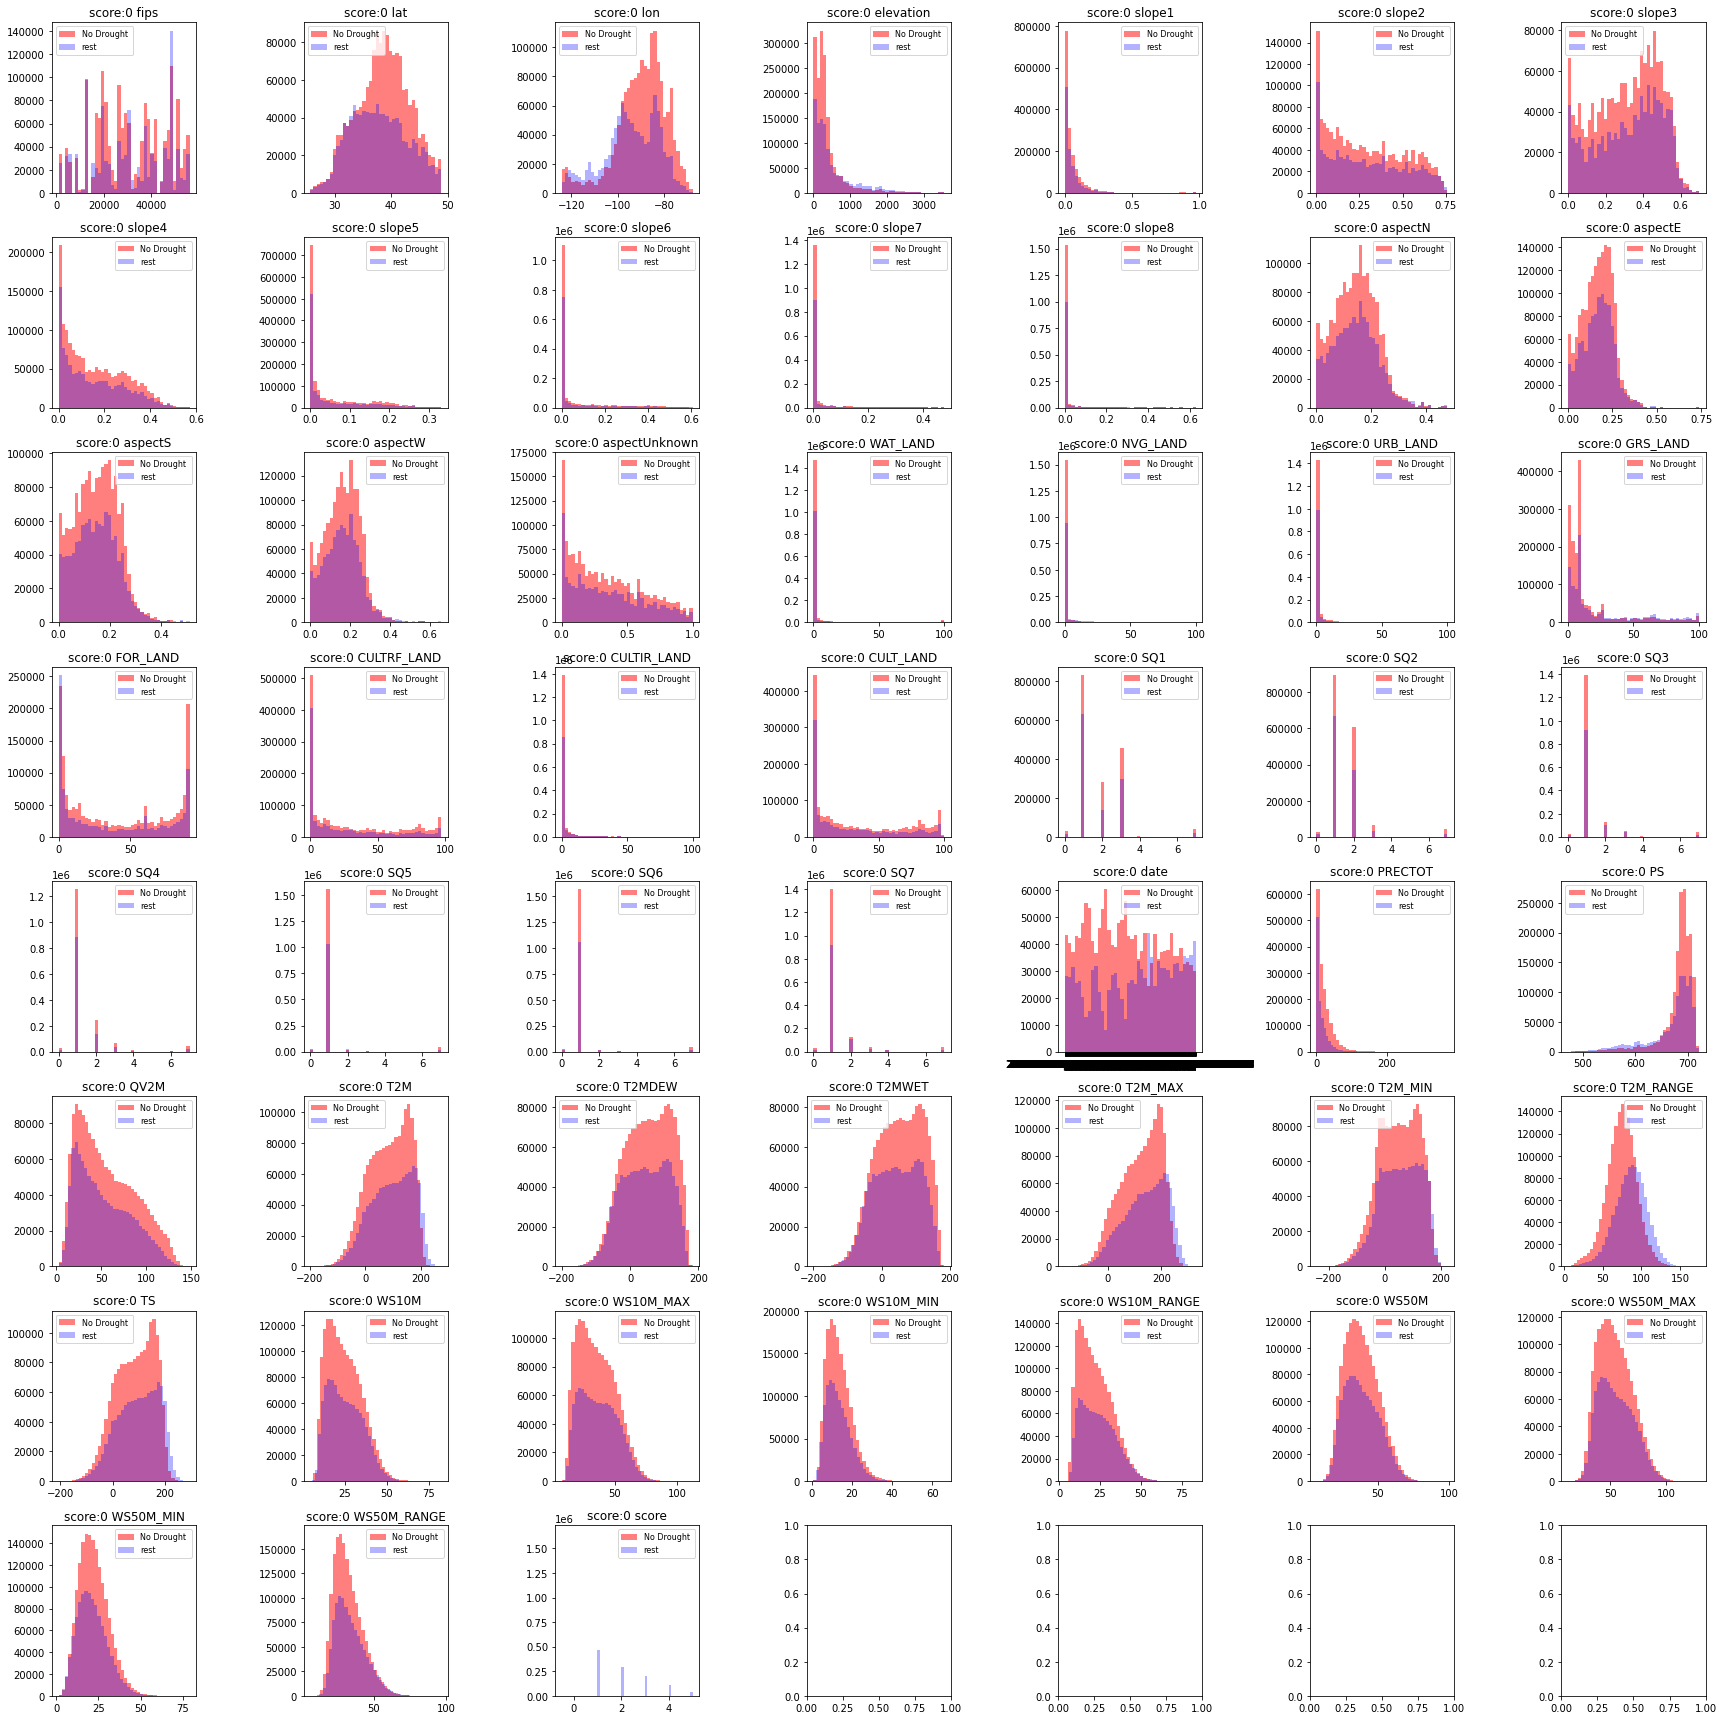

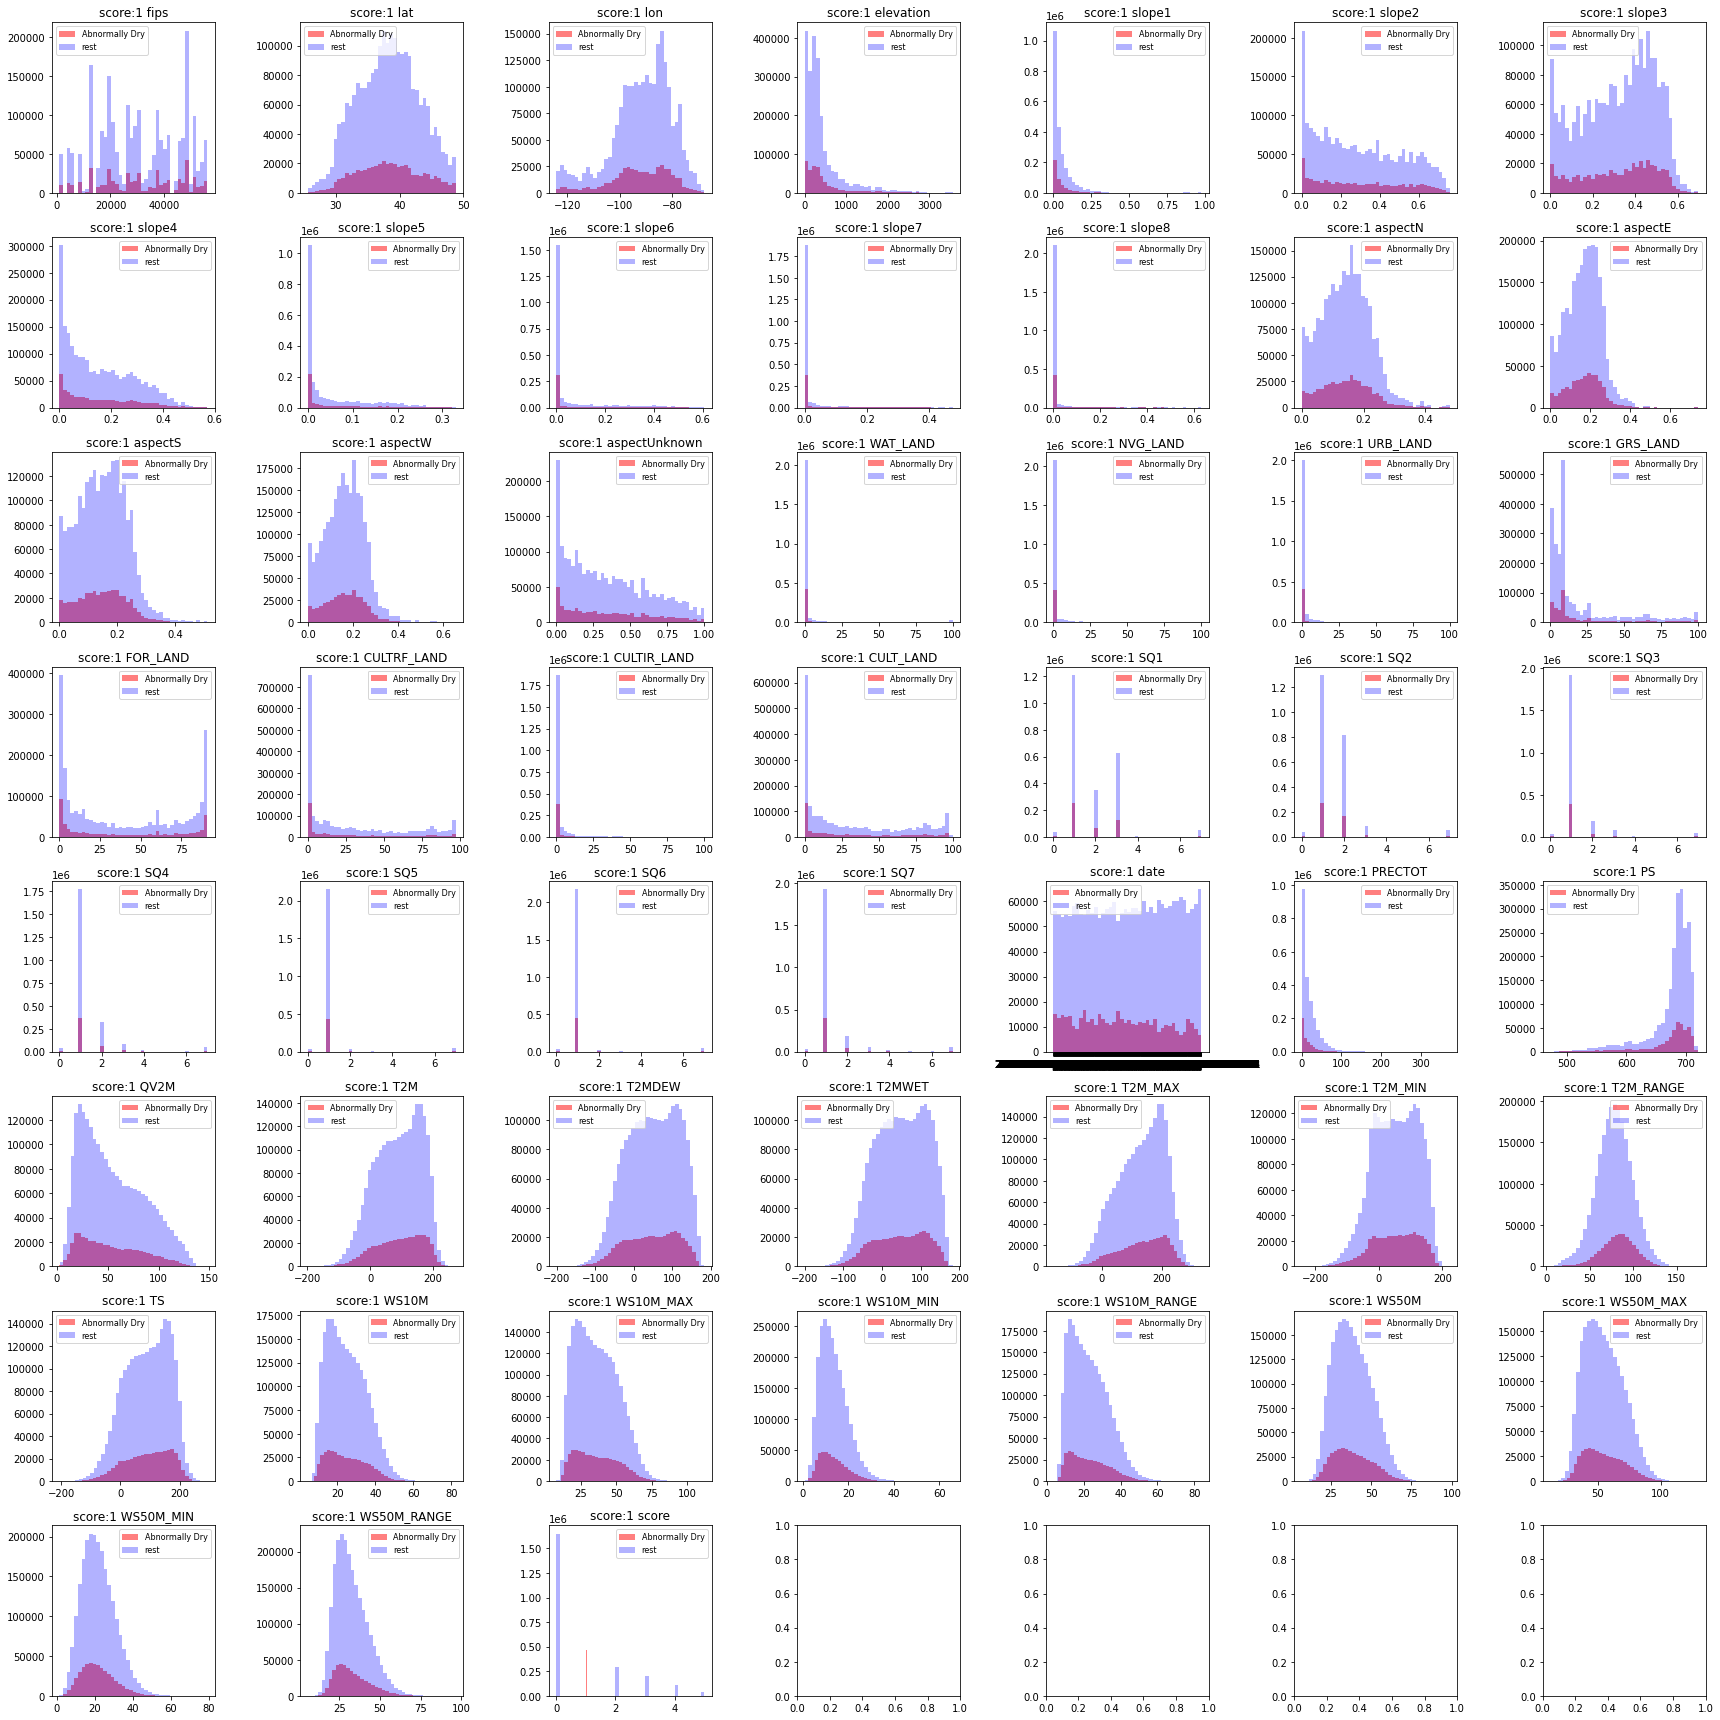

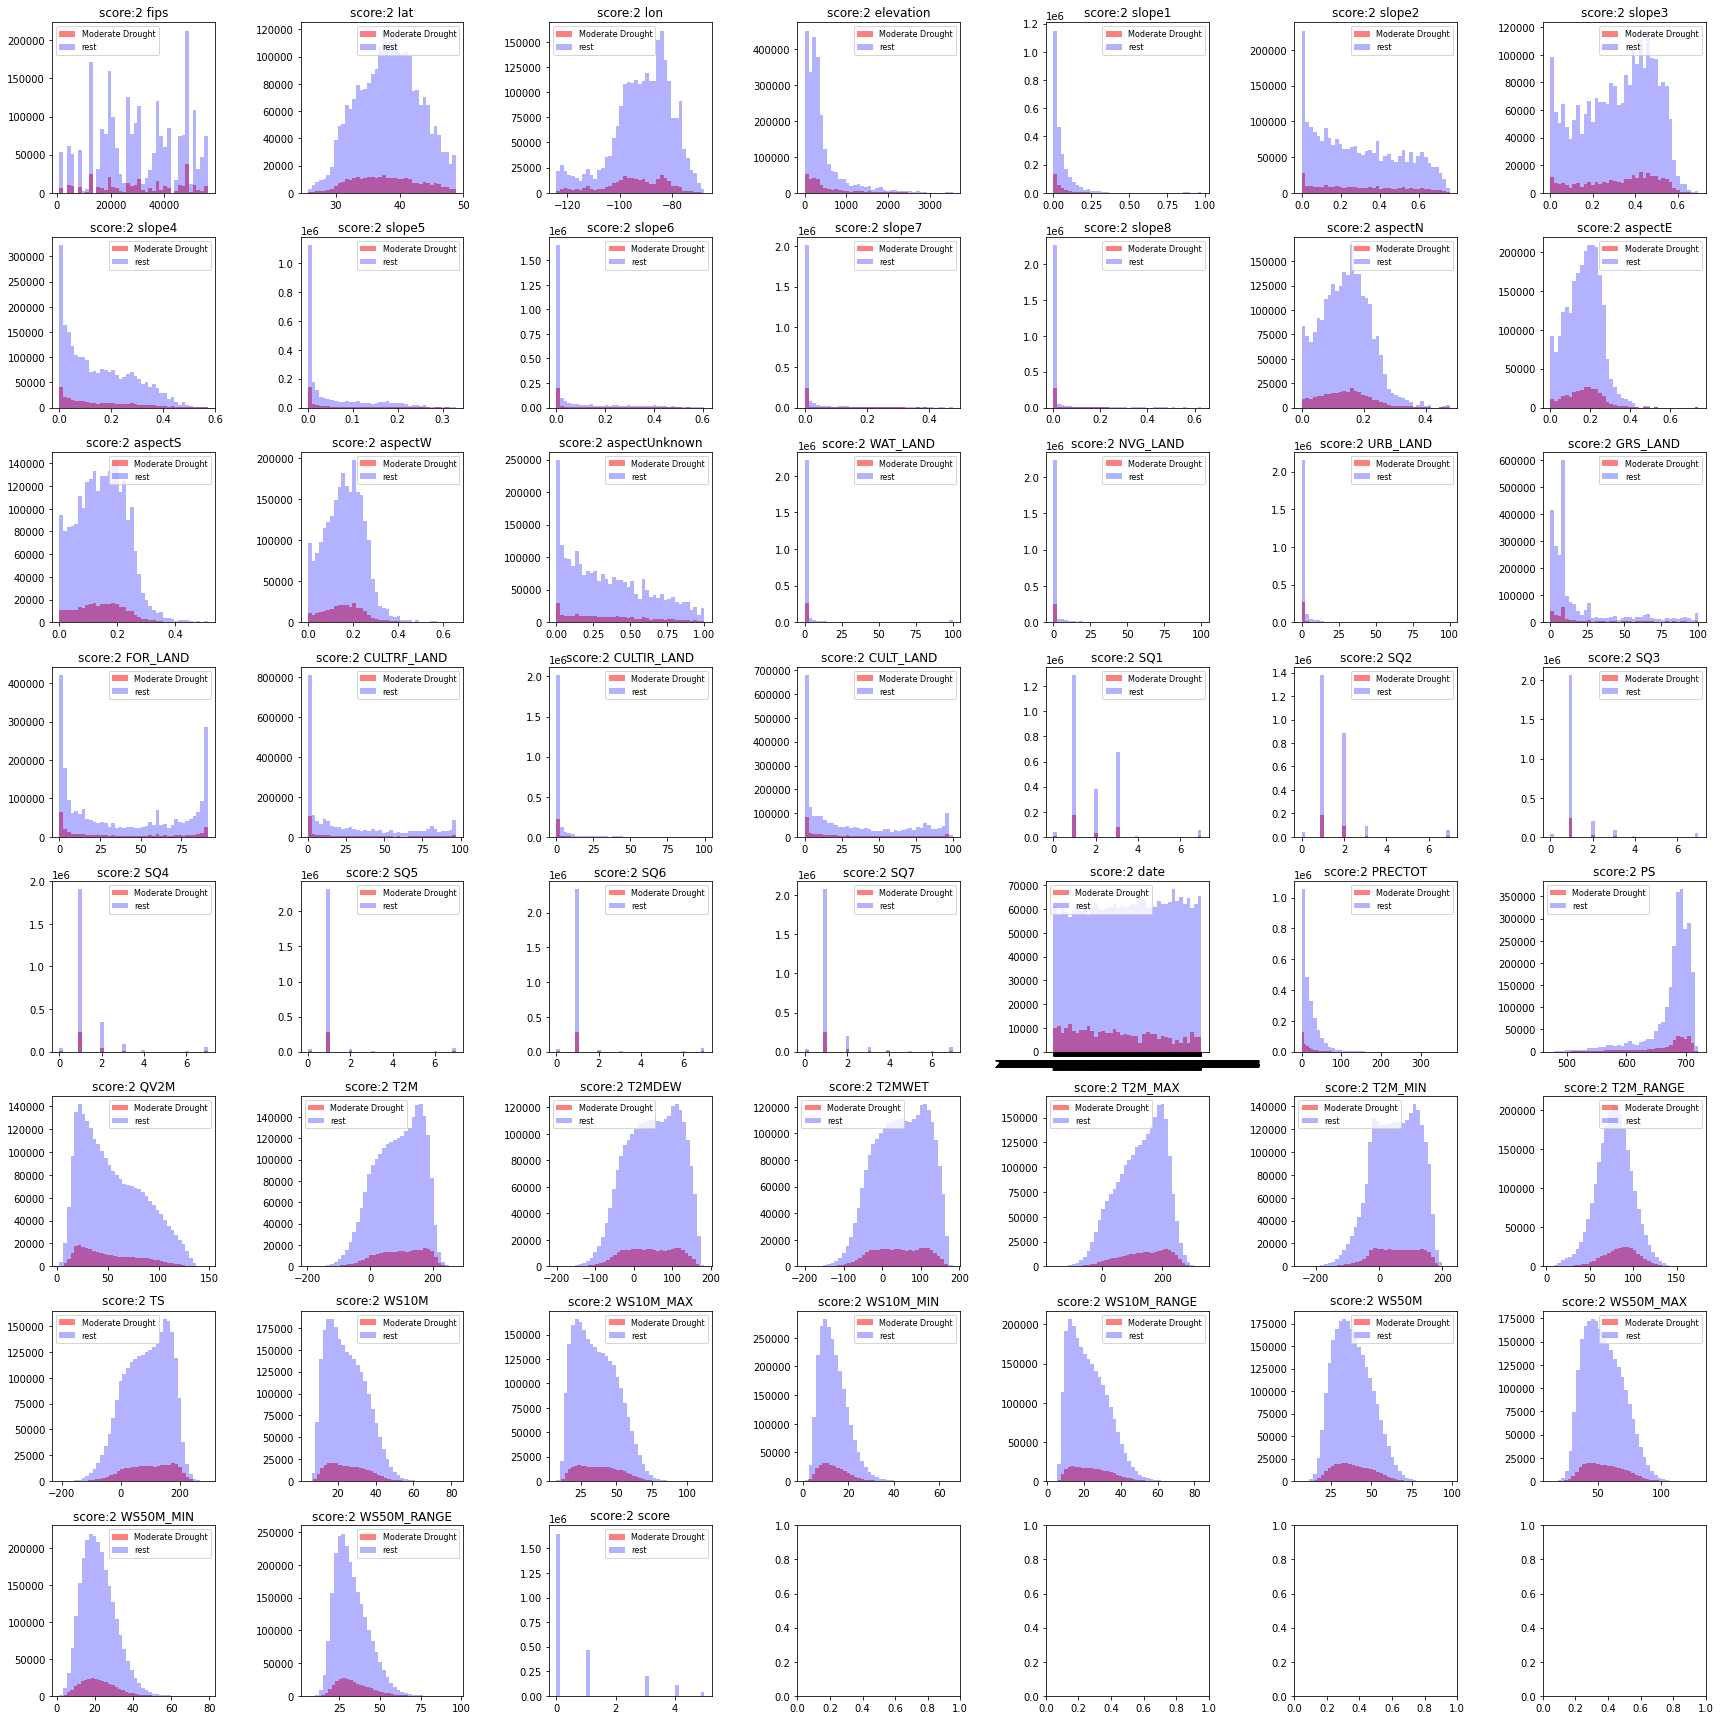

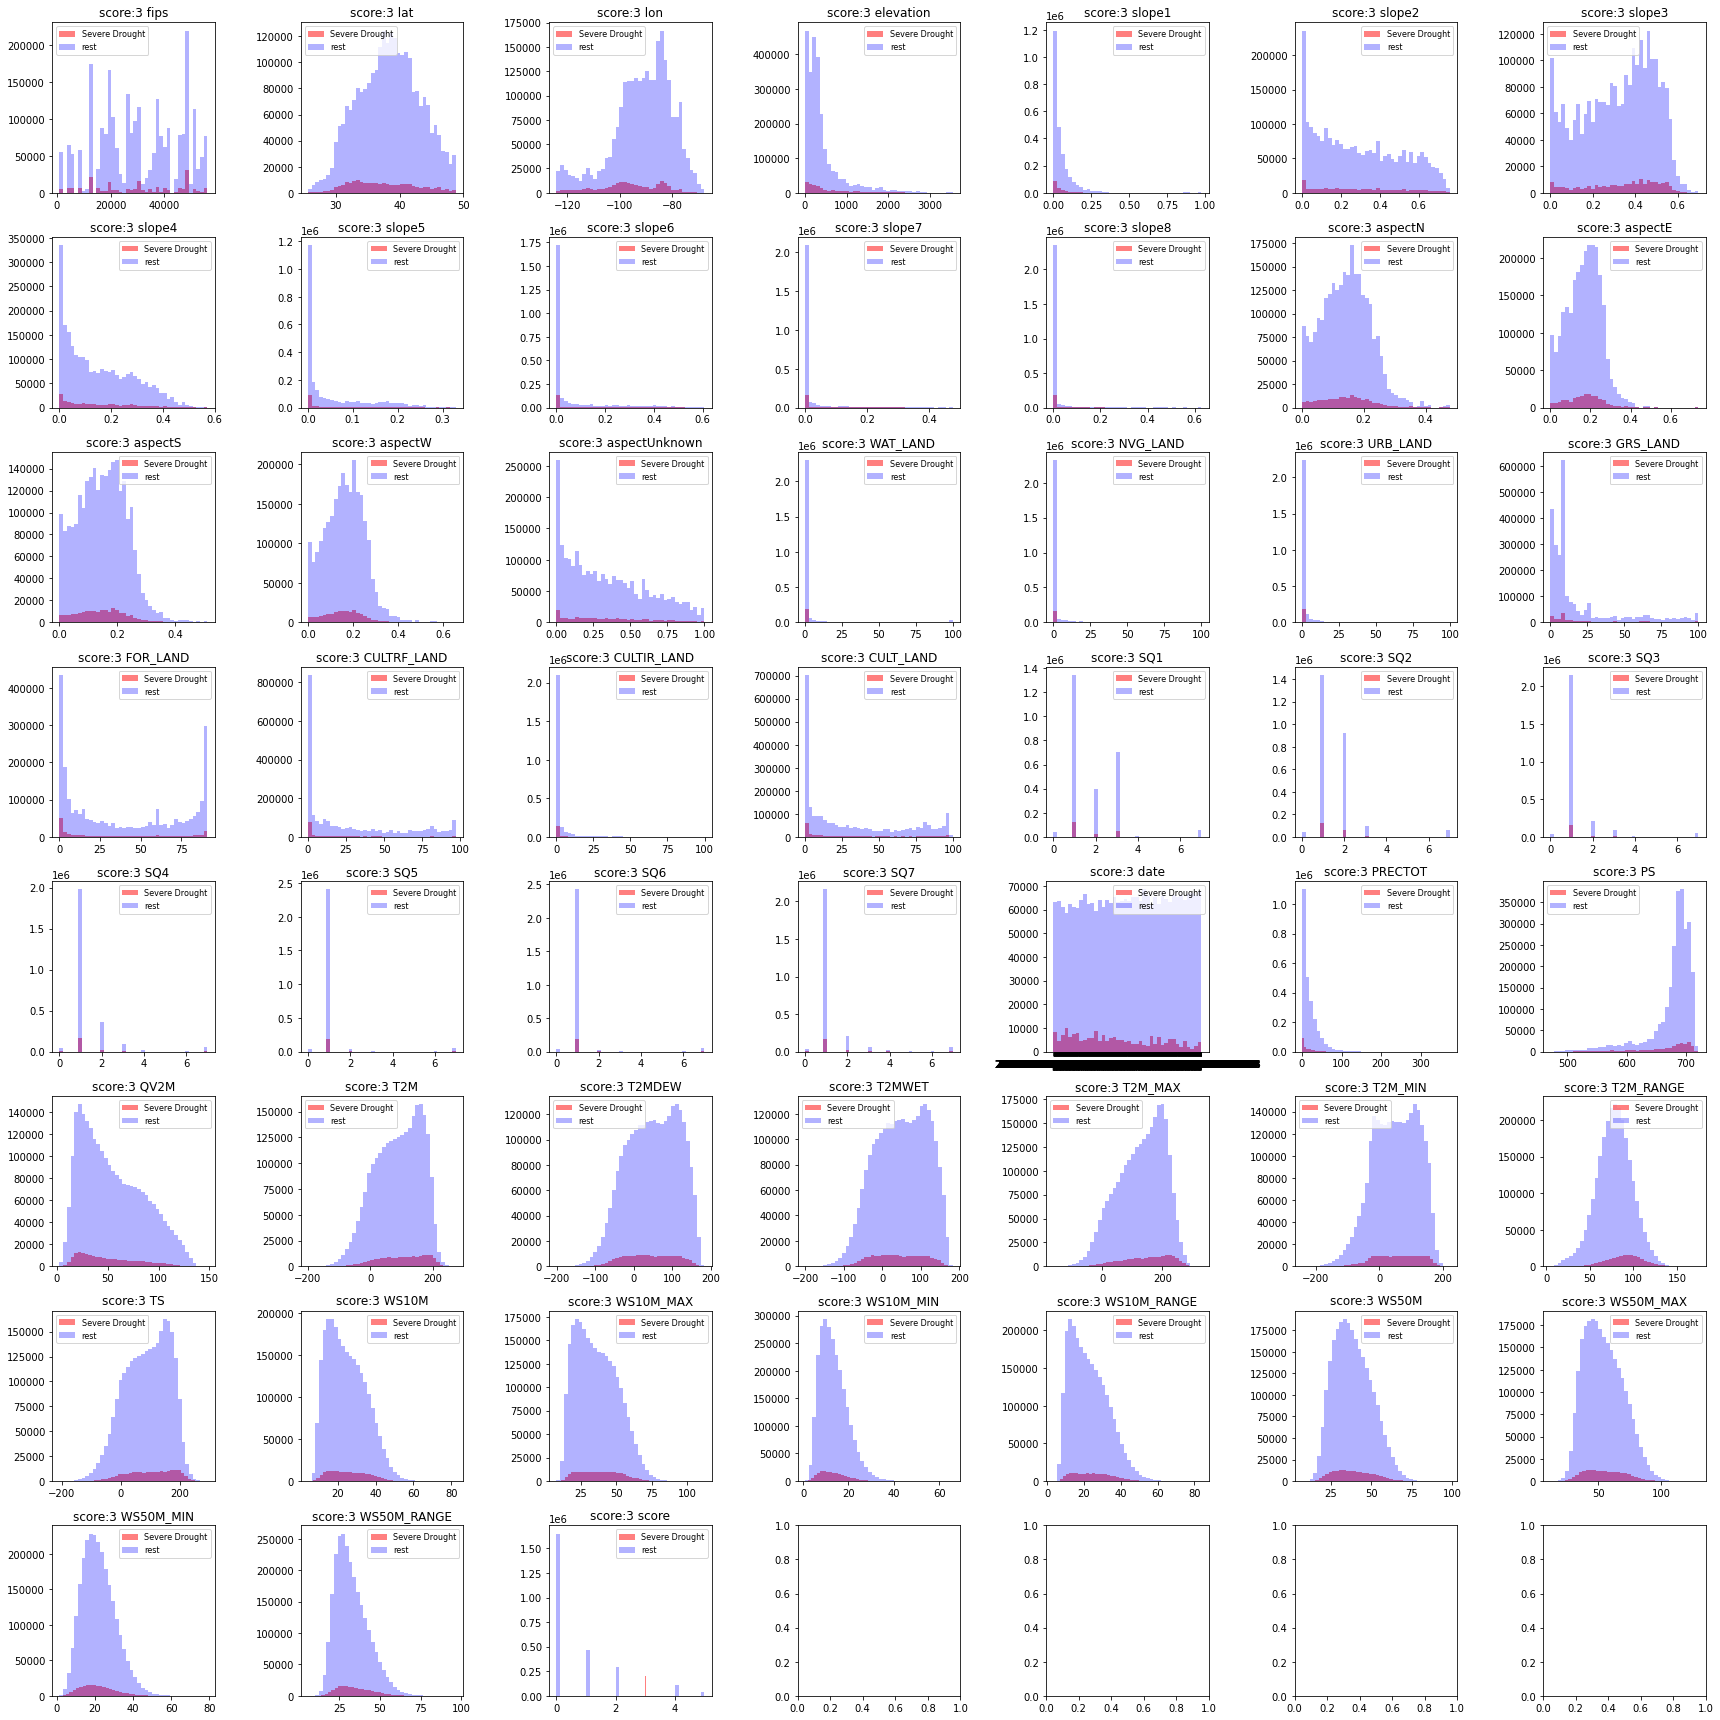

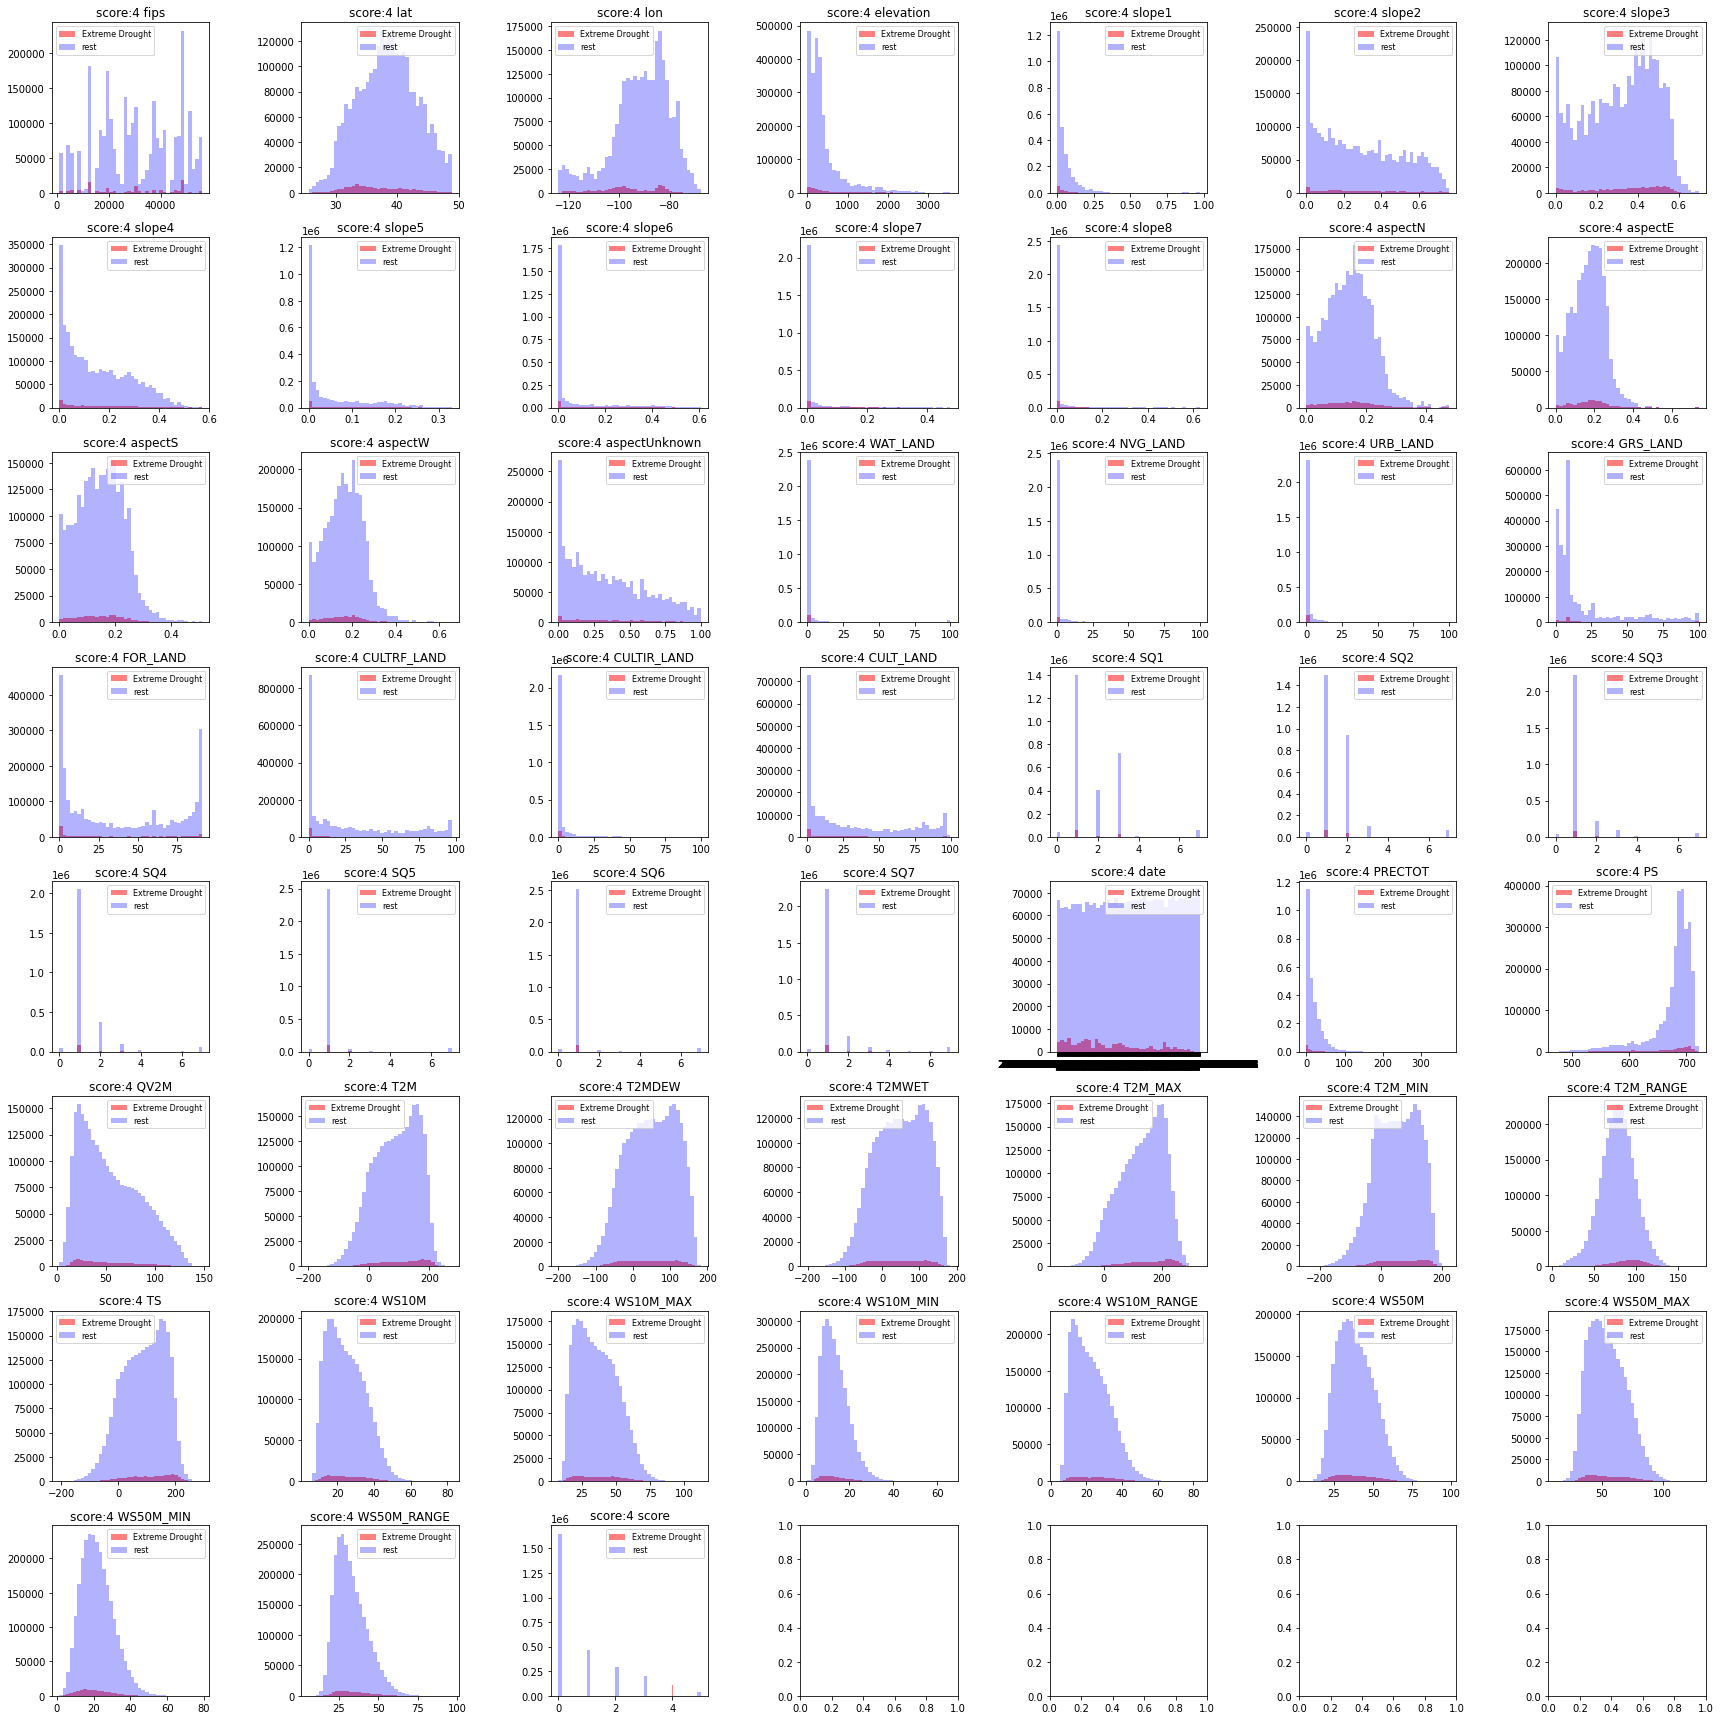

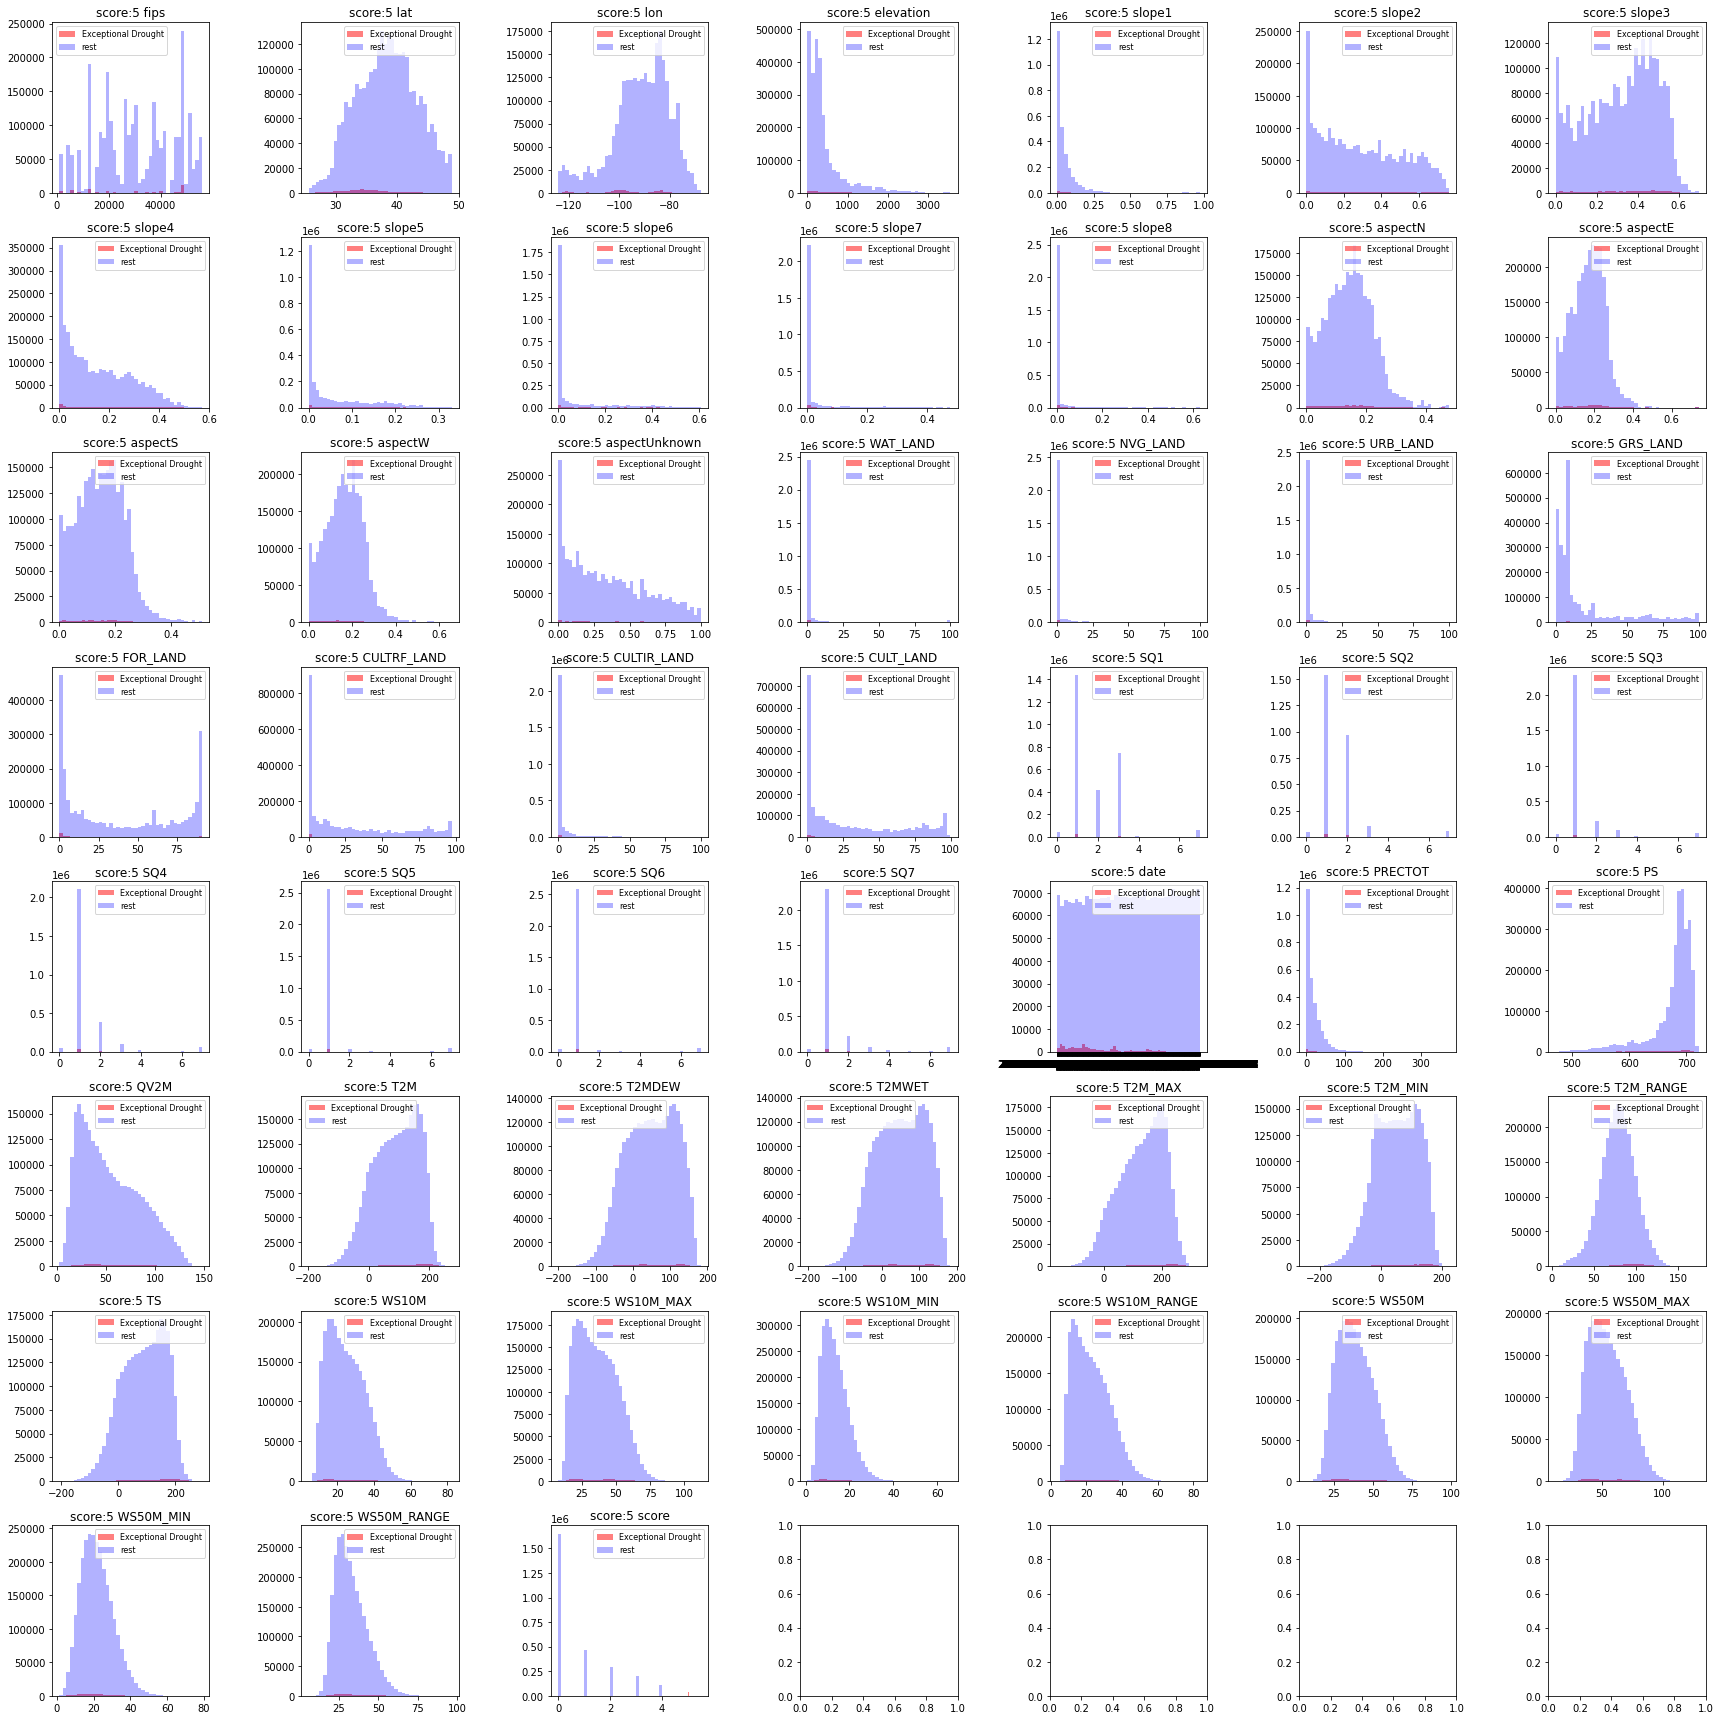

CPU times: user 4min 5s, sys: 18.5 s, total: 4min 23s
Wall time: 4min 37s


In [12]:
%%time
l_scores = [nd,ad,md,sd,ed,exctd]
l_rest_scores = [nd_rest,ad_rest,md_rest,sd_rest,ed_rest,exctd_rest]


for i in range(6): # number of different classes 
    _, axes = plt.subplots(8,7, figsize=(24, 24))
    ax = axes.ravel() # flatten the 2D array
    for c,j in enumerate(train.columns):                 
        bins = 40
        #---plot histogram for each feature---
        ax[c].hist(l_scores[i][j], bins=bins, color='r', alpha=.5)
        ax[c].hist(l_rest_scores[i][j], bins=bins, color='b', alpha=0.3)
        #---set the title---
        ax[c].set_title('score:'+ str(i) + ' ' + j, fontsize=12)    
        #---display the legend---
        ax[c].legend([score_category[i],'rest'], loc='best', fontsize=8)
    
    plt.tight_layout()
    plt.show()

data is very imbalanced for scores. It is hard to see any distiction between exceptional drought because of this.

In [13]:
mads = train.mad()
mads

fips             12919.902424
lat                  3.970984
lon                  9.091196
elevation          334.602776
slope1               0.050656
slope2               0.187226
slope3               0.143669
slope4               0.109789
slope5               0.059704
slope6               0.091576
slope7               0.036004
slope8               0.016310
aspectN              0.063046
aspectE              0.068045
aspectS              0.067537
aspectW              0.070156
aspectUnknown        0.231208
WAT_LAND             5.070916
NVG_LAND             3.200382
URB_LAND             3.741123
GRS_LAND            19.150496
FOR_LAND            31.511683
CULTRF_LAND         27.399059
CULTIR_LAND          5.114263
CULT_LAND           28.981629
SQ1                  0.941411
SQ2                  0.678265
SQ3                  0.514890
SQ4                  0.598092
SQ5                  0.312648
SQ6                  0.292410
SQ7                  0.520955
PRECTOT             15.335666
PS        

seems like fips, elivation, and all of t2m stats have good variation from mad score.  

In [15]:
corr_matrix = train.corr()
corr_matrix

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
fips,1.000000,0.141188,0.046335,0.021808,-0.087860,-0.087551,-0.058185,0.040731,0.123977,0.108115,...,-0.045779,0.060075,0.051934,0.054916,0.041704,0.071804,0.069585,0.063181,0.051625,-0.029669
lat,0.141188,1.000000,-0.191444,0.256786,-0.088173,-0.105000,-0.181921,0.047719,0.153418,0.147754,...,-0.398393,0.234542,0.245342,0.148752,0.262796,0.211750,0.233117,0.131733,0.241766,-0.120171
lon,0.046335,-0.191444,1.000000,-0.587686,0.009869,-0.065564,0.126735,0.148158,0.027773,-0.121274,...,0.060845,-0.205586,-0.262310,-0.067471,-0.335387,-0.113640,-0.172209,0.002227,-0.264299,-0.212382
elevation,0.021808,0.256786,-0.587686,1.000000,-0.153779,-0.200360,-0.230501,0.030934,0.240811,0.370158,...,-0.187941,0.055211,0.117888,-0.073893,0.212664,0.008242,0.063969,-0.102795,0.185967,0.177050
slope1,-0.087860,-0.088173,0.009869,-0.153779,1.000000,0.499032,-0.287827,-0.472033,-0.366108,-0.288654,...,0.065293,0.199170,0.193919,0.186063,0.167009,0.164981,0.162577,0.153345,0.115682,-0.002317
slope2,-0.087551,-0.105000,-0.065564,-0.200360,0.499032,1.000000,0.097689,-0.698152,-0.699474,-0.598772,...,0.095870,0.420636,0.421652,0.361719,0.388609,0.376823,0.390746,0.310156,0.328319,0.029814
slope3,-0.058185,-0.181921,0.126735,-0.230501,-0.287827,0.097689,1.000000,0.197177,-0.443883,-0.594073,...,0.100767,0.067768,0.067782,0.055500,0.064044,0.103717,0.104813,0.078297,0.092286,0.038139
slope4,0.040731,0.047719,0.148158,0.030934,-0.472033,-0.698152,0.197177,1.000000,0.606237,0.157773,...,-0.049605,-0.322907,-0.319483,-0.290712,-0.284557,-0.253163,-0.260654,-0.218290,-0.209198,-0.022426
slope5,0.123977,0.153418,0.027773,0.240811,-0.366108,-0.699474,-0.443883,0.606237,1.000000,0.754279,...,-0.118371,-0.397137,-0.390198,-0.358320,-0.345603,-0.345090,-0.354561,-0.288368,-0.291944,-0.049277
slope6,0.108115,0.147754,-0.121274,0.370158,-0.288654,-0.598772,-0.594073,0.157773,0.754279,1.000000,...,-0.123386,-0.369280,-0.358877,-0.340764,-0.311202,-0.345308,-0.350752,-0.291917,-0.283087,-0.019446


None have a very strong corilation to score, so I will not eliminate any features for training. 

# PCA

In [20]:
# pca 
y = train['score']
X = train[train.columns[:-1]]
X.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1001,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,...,88.64,59.91,15.40,23.14,8.67,14.46,30.93,46.12,15.96,30.15
1,1001,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,...,92.24,69.83,16.47,22.80,10.43,12.37,34.09,45.56,19.69,25.85
2,1001,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,...,80.49,31.56,20.53,28.63,12.70,15.93,36.89,50.22,25.03,25.20
3,1001,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,...,66.83,5.47,16.54,23.48,9.23,14.26,30.61,43.24,18.06,25.16
4,1001,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,...,101.36,25.48,14.53,21.24,7.36,13.88,26.69,41.16,11.58,29.59


In [26]:
X = X.drop('date',axis=1)
X.columns

Index(['fips', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE',
       'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND', 'NVG_LAND',
       'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND',
       'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7', 'PRECTOT',
       'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN',
       'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE',
       'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE'],
      dtype='object')

In [27]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [28]:
pca = PCA()

pca.fit(X_scaled)

pca_data = pca.transform(X_scaled)

In [50]:
per = 0
count = 0
for i in pca.explained_variance_ratio_:
    per += i
    print('for 95% of variance took: ', count, per)
    if per > .95:
        break
    count += 1

for 95% of variance took:  0 0.23031553948722952
for 95% of variance took:  1 0.3975724609401522
for 95% of variance took:  2 0.5313986952827999
for 95% of variance took:  3 0.6095552165543188
for 95% of variance took:  4 0.6710841914974575
for 95% of variance took:  5 0.7129109730049785
for 95% of variance took:  6 0.7476401726310933
for 95% of variance took:  7 0.7715056824964928
for 95% of variance took:  8 0.7939220529610556
for 95% of variance took:  9 0.815186695055846
for 95% of variance took:  10 0.8352547736791152
for 95% of variance took:  11 0.8533439700271418
for 95% of variance took:  12 0.8701238348567045
for 95% of variance took:  13 0.8855224979805445
for 95% of variance took:  14 0.8986159176400313
for 95% of variance took:  15 0.9113067059365002
for 95% of variance took:  16 0.9214772523604162
for 95% of variance took:  17 0.9306723777254113
for 95% of variance took:  18 0.9389257731801948
for 95% of variance took:  19 0.947093613657624
for 95% of variance took:  20 0

In [46]:
len(pca.components_)

50

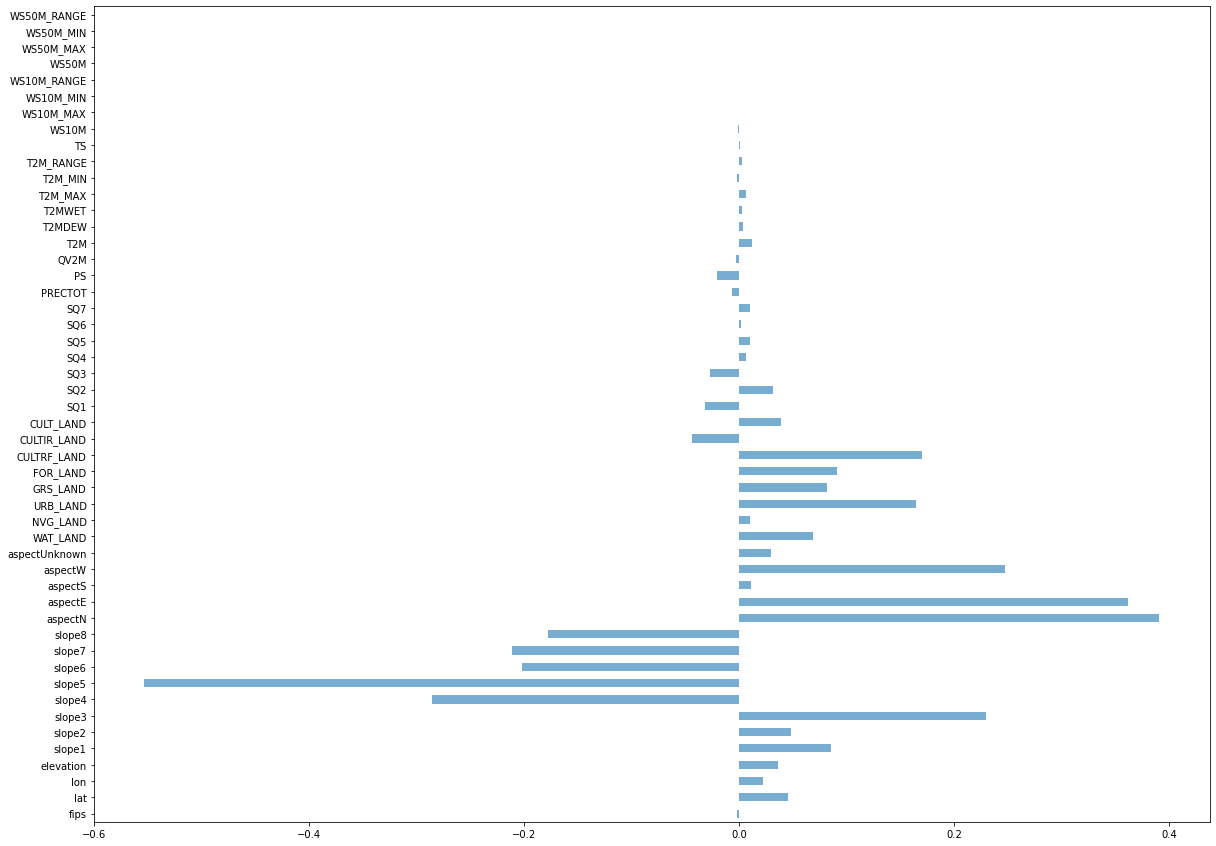

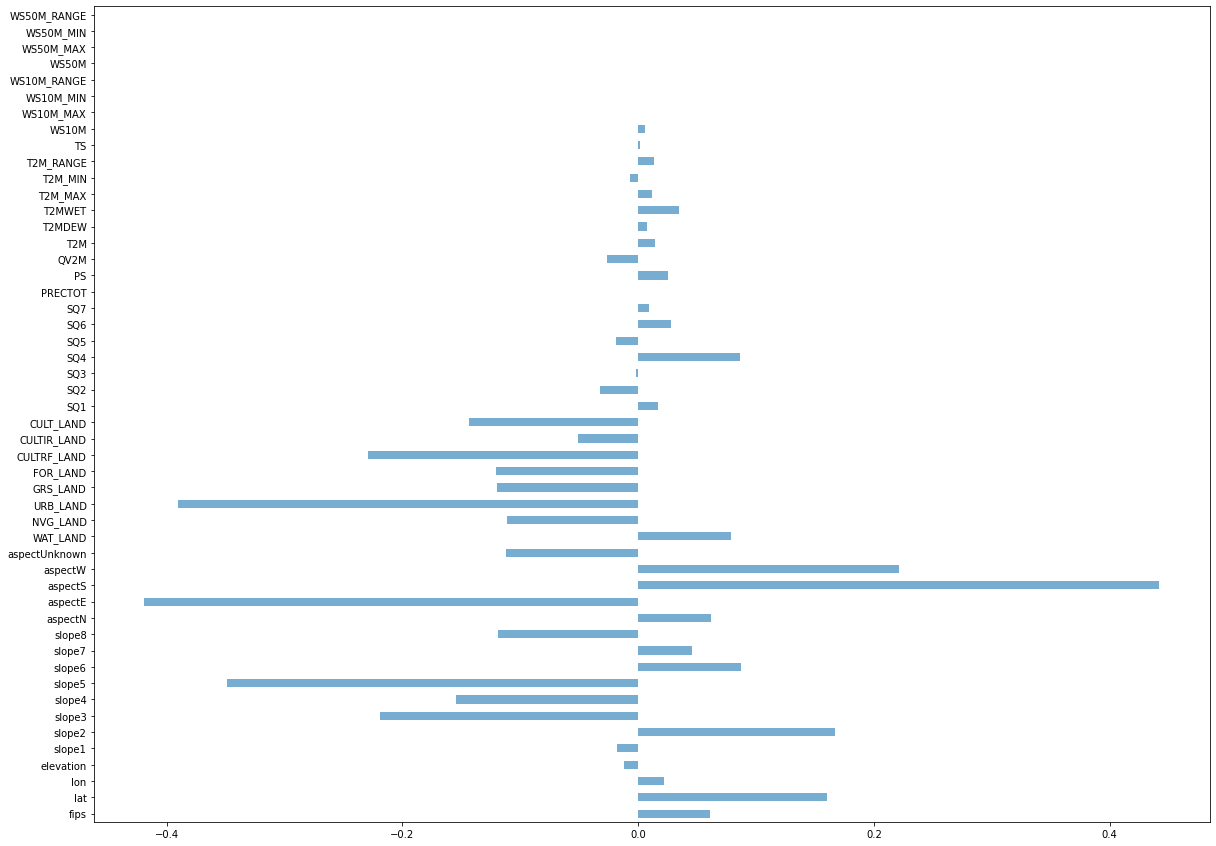

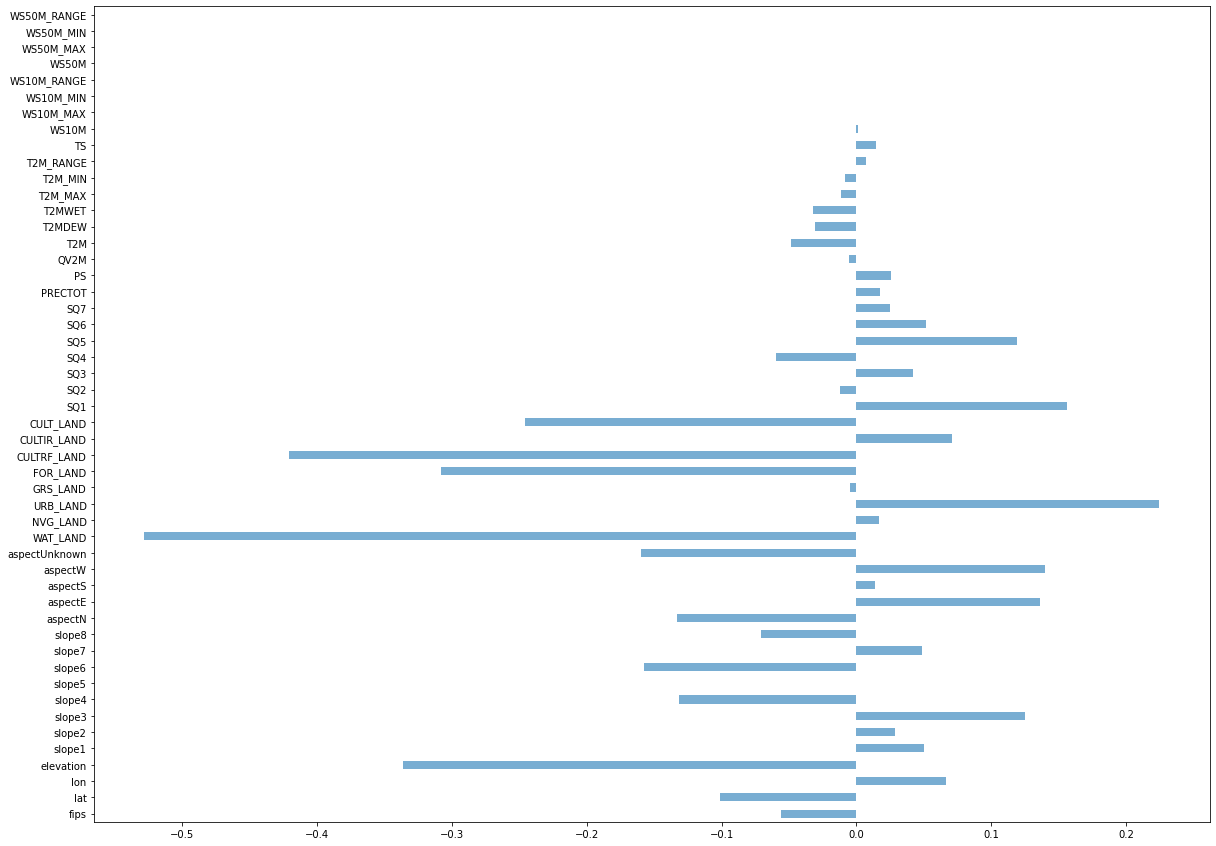

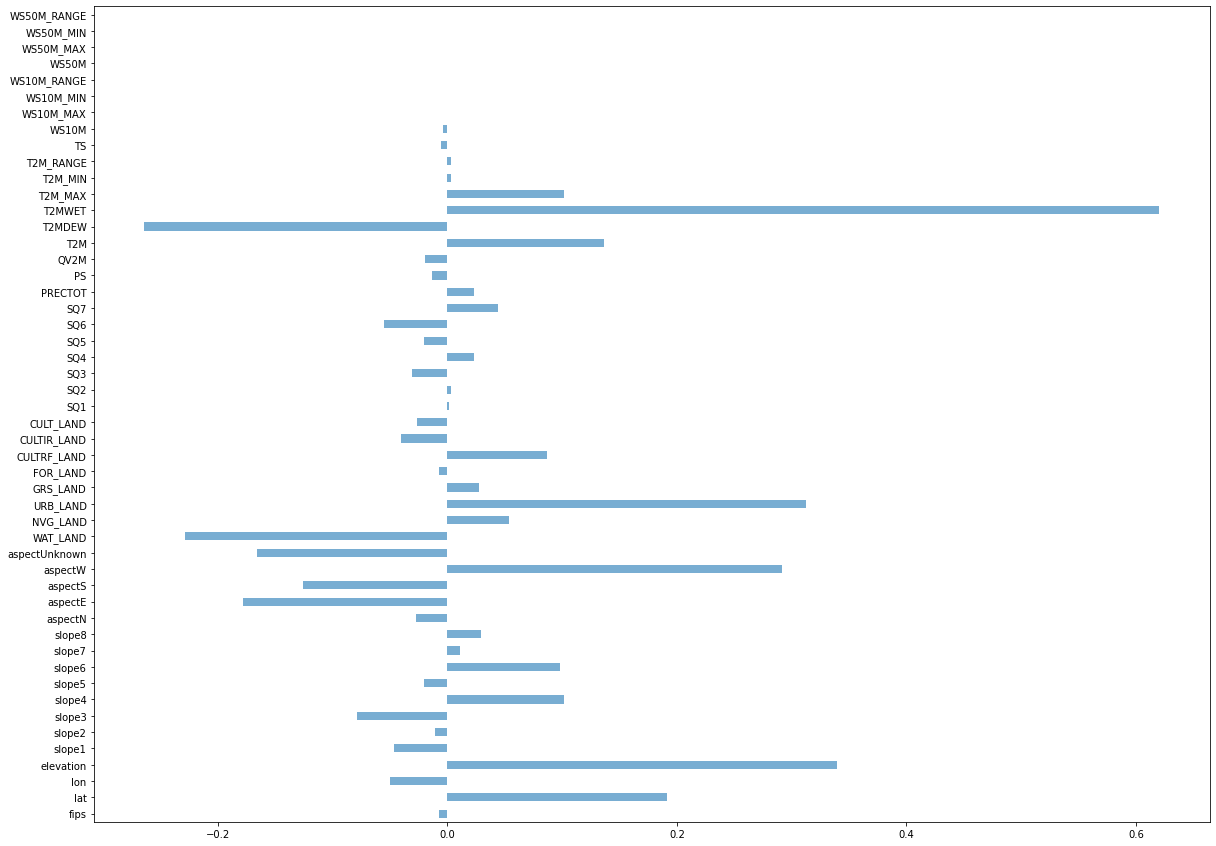

In [49]:
attrib = list(X.columns)

for i in range(4):
    plt.figure(figsize=(20,15))
    pcdata = pd.Series(pca.components_[:,i], index=attrib)

    pcdata.plot(kind='barh',alpha=.6)
    plt.show()

The most important features from the first 4 PCA include (67% of variance); 1 pc aspectN slope5, 2 pc aspectE aspectS, 3 pc WAT_LAND, 4 pc T2MWET. The aspects suprise me due to it having a small mad. all WS50 features, and some of the WS10 was a non factor in all of the pc's 

In [ ]:
# do scatter plots of data 